# CyberBullying Detection using NLP & Machine Learning

### 1. Libraries

In [145]:
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import  TfidfVectorizer
import re
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

### 2. Import Dataset

In [146]:
df_cyber = pd.read_csv("ExportedDatasetsNew/cyberbullying2.csv")

### 3.  Check first 10 lines

In [147]:
df_cyber.head(10)

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",0
1,Why is #aussietv so white? #MKR #theblock #ImA...,0
2,@XochitlSuckkks a classy whore? Or more red ve...,0
3,"@Jason_Gio meh. :P thanks for the heads up, b...",0
4,@RudhoeEnglish This is an ISIS account pretend...,0
5,"@Raja5aab @Quickieleaks Yes, the test of god i...",0
6,Karma. I hope it bites Kat on the butt. She is...,0
7,@stockputout everything but mostly my priest,0
8,Rebecca Black Drops Out of School Due to Bully...,0
9,@Jord_Is_Dead http://t.co/UsQInYW5Gn,0


### 4. Identify Dataset & Drop Missing Data

In [148]:
df_cyber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81411 entries, 0 to 81410
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          81411 non-null  object
 1   cyberbullying_type  81411 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.2+ MB


In [149]:
df_cyber.shape

(81411, 2)

In [150]:
df_cyber.isnull().sum()

tweet_text            0
cyberbullying_type    0
dtype: int64

In [151]:
df_cyber = df_cyber.dropna()

In [152]:
df_cyber.isnull().sum()

tweet_text            0
cyberbullying_type    0
dtype: int64

### 4.2 Identify & Drop Duplicates

In [153]:
df_cyber.tweet_text.duplicated().sum()

13818

In [154]:
df_cyber.duplicated(subset='tweet_text').sum()

13818

In [155]:
df_cyber.duplicated(subset=['tweet_text','cyberbullying_type']).sum()

11301

In [156]:
df_cyber = df_cyber.drop_duplicates(subset=['tweet_text','cyberbullying_type'])

In [157]:
df_cyber.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70110 entries, 0 to 81410
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          70110 non-null  object
 1   cyberbullying_type  70110 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ MB


In [158]:
df_cyber['cyberbullying_type'].value_counts()

1    42106
0    28004
Name: cyberbullying_type, dtype: int64

In [159]:
df_cyber.tweet_text.duplicated().sum()

2517

In [160]:
df_cyber.drop_duplicates(keep=False, inplace=True)

In [161]:
df_cyber.duplicated().sum()

0

In [162]:
df_cyber.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70110 entries, 0 to 81410
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          70110 non-null  object
 1   cyberbullying_type  70110 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ MB


In [163]:
# # Shuffling
# df_cyber = df_cyber.sample(frac=1)
# df_cyber.reset_index(inplace=True)
# df_cyber.drop(["index"], axis=1, inplace=True)

### 5. Graph of Dataset

[Text(0.5, 1.0, 'Graph of Dataset')]

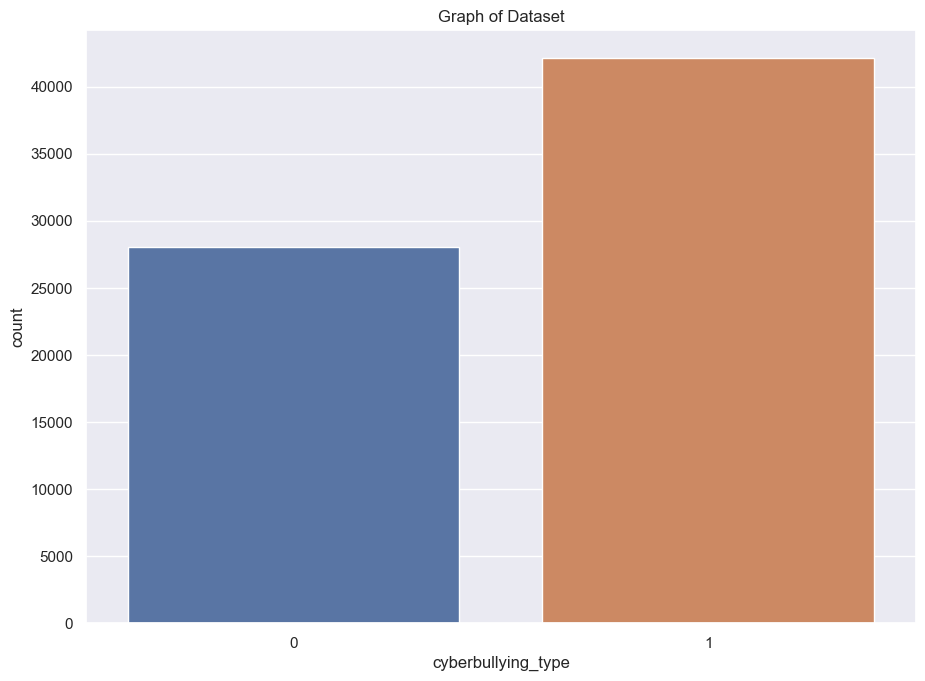

In [164]:
sns.set(rc={'figure.figsize':(10.7,7.7)})
sns.countplot(x='cyberbullying_type',data=df_cyber).set(title="Graph of Dataset")

### 6 Clean Dataset

In [165]:
def clean_tweets(tweet):
    # remove URL
    tweet = re.sub(r'http\S+', '', tweet)
    # Remove usernames
    tweet = re.sub(r'@[^\s]+[\s]?','',tweet)
    # Remove hashtags
    tweet = re.sub(r'#[^\s]+[\s]?','',tweet)
    # remove special characters
    tweet = re.sub('[^ a-zA-Z0-9]' , '', tweet)
    # remove RT
    tweet = re.sub('RT' , '', tweet)
    # remove Numbers
    tweet = re.sub('[0-9]', '', tweet)

    return tweet

In [166]:
df_cyber["tweet_text"] = df_cyber["tweet_text"].apply(clean_tweets)
df_cyber.to_csv('ExportedDatasetsNew/cyberbullying_clean2.csv', index=False)
df_cyber.head(30)

,tweet_text,cyberbullying_type
0,In other words your food was crapilicious,0
1,Why is so white,0
2,a classy whore Or more red velvet cupcakes,0
3,meh P thanks for the heads up but not too con...,0
4,This is an ISIS account pretending to be a Kur...,0
5,Yes the test of god is that good or bad or ind...,0
6,Karma I hope it bites Kat on the butt She is j...,0
7,everything but mostly my priest,0
8,Rebecca Black Drops Out of School Due to Bullying,0
9,,0


In [167]:
df_cyber.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70110 entries, 0 to 81410
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          70110 non-null  object
 1   cyberbullying_type  70110 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ MB


In [168]:
# Identify rows with empty text
empty_rows = df_cyber[df_cyber.applymap(lambda x: x == '').any(axis=1)]

# Remove these rows from the dataset
df_cyber = df_cyber.drop(empty_rows.index)

In [169]:
df_cyber.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69987 entries, 0 to 81410
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          69987 non-null  object
 1   cyberbullying_type  69987 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ MB


In [170]:
df_cyber.to_csv('ExportedDatasetsNew/cyberbullying_clean_empty2.csv', index=False)
df_cyber.head(30)

,tweet_text,cyberbullying_type
0,In other words your food was crapilicious,0
1,Why is so white,0
2,a classy whore Or more red velvet cupcakes,0
3,meh P thanks for the heads up but not too con...,0
4,This is an ISIS account pretending to be a Kur...,0
5,Yes the test of god is that good or bad or ind...,0
6,Karma I hope it bites Kat on the butt She is j...,0
7,everything but mostly my priest,0
8,Rebecca Black Drops Out of School Due to Bullying,0
10,The Bully flushes on KD,0


### 7. Stopwords

In [171]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [172]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [173]:
# Download the NLTK resources that are needed
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\giann\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\giann\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [174]:
df_cyber["tweet_text"] = df_cyber["tweet_text"].apply(lambda x: x.lower())

In [175]:
# Initialize the stemmer and the stop words list
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

In [180]:
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text) # Remove punctuation
    text = text.lower() # Convert to lowercase
    text = [stemmer.stem(word) for word in text.split() if word not in stopwords.words('english')] # Remove stopwords
    return " ".join(text)

In [181]:
df_cyber["tweet_text"] = df_cyber["tweet_text"].apply(preprocess_text)

In [60]:
df_cyber.head(30)

,tweet_text,cyberbullying_type
0,word food crapilici,0
1,whi white,0
2,classi whore red velvet cupcak,0
3,meh p thank head concern anoth angri dude twitter,0
4,thi isi account pretend kurdish account like i...,0
5,ye test god good bad indiff weird whatev prove...,0
6,karma hope bite kat butt nasti,0
7,everyth mostli priest,0
8,rebecca black drop school due bulli,0
10,the bully flushes on kd,0


### 8. Data pre-processing

In [91]:
#f_cyber.dropna(axis = 0)

,tweet_text,cyberbullying_type
0,classy whore red velvet cupcakes,0
1,meh p thanks heads concerned another angry dud...,0
2,yes test god good bad indifferent weird whatev...,0
3,karma hope bites kat butt nasty,0
4,rebecca black drops school due bullying,0
...,...,...
61279,loving credit crunch,0
61280,thats killing smile flattered,0
61282,agree awful makes sense regardless last mistak...,0
61283,called yesterday guidance counselors office th...,0


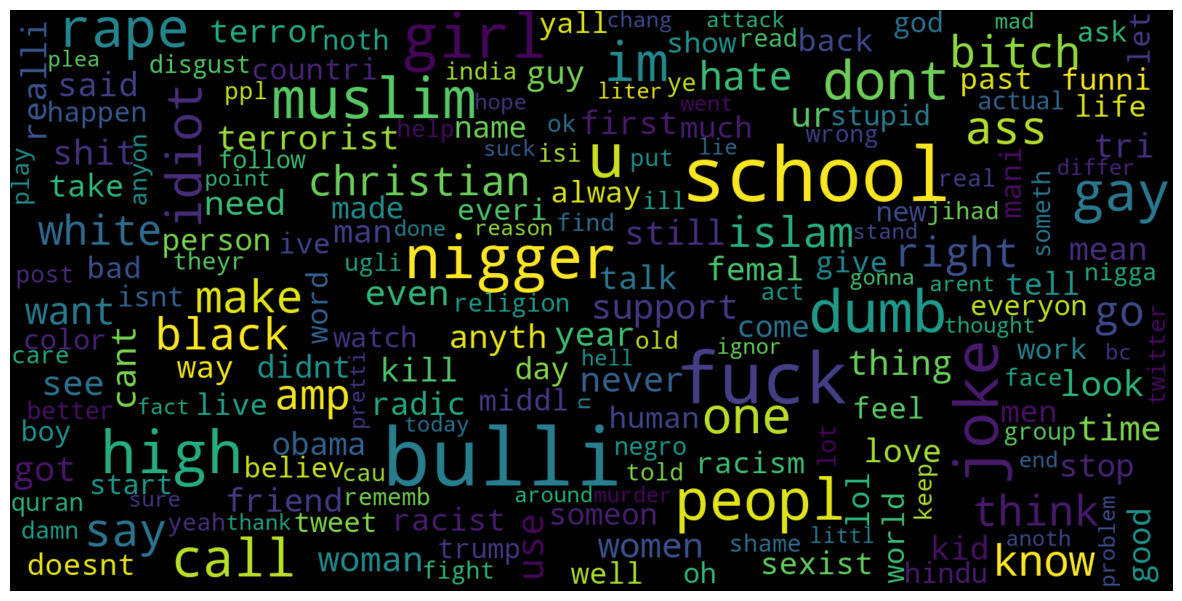

In [182]:
# Cyberbullying
consolidated = ' '.join(
    word for word in df_cyber['tweet_text'][df_cyber['cyberbullying_type'] == 1].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

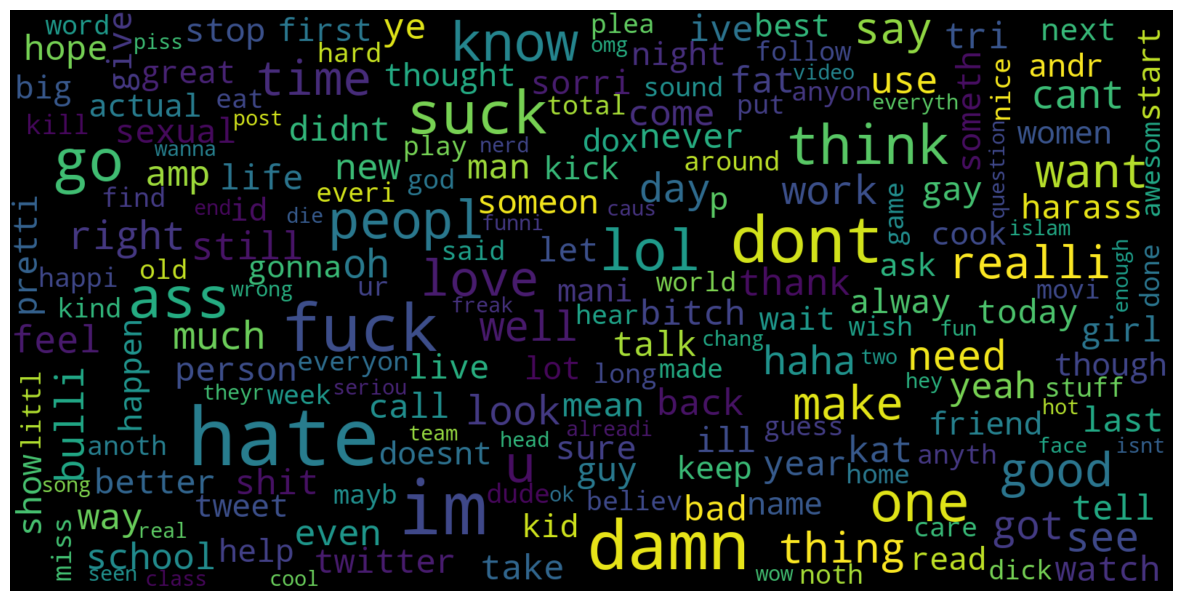

In [183]:
# Not Cyberbullying
consolidated = ' '.join(
    word for word in df_cyber['tweet_text'][df_cyber['cyberbullying_type'] == 0].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

<AxesSubplot: title={'center': 'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

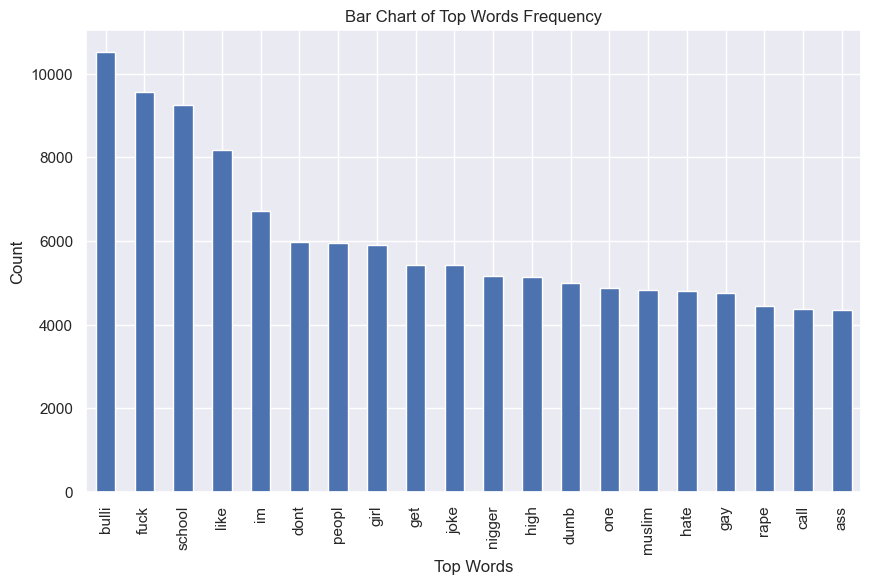

In [184]:


from sklearn.feature_extraction.text import CountVectorizer


def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1],
                        reverse=True)
    return words_freq[:n]


common_words = get_top_n_words(df_cyber['tweet_text'].astype('U'), 20)
df1 = pd.DataFrame(common_words, columns=['Review', 'count'])

df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel="Top Words",
    ylabel="Count",
    title="Bar Chart of Top Words Frequency"
)

### 11. Train/Test Splitting

In [185]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(df_cyber['tweet_text'],
                                                    df_cyber['cyberbullying_type'],
                                                    test_size=0.2,
                                                    random_state=1)

when random_state set to an integer, train_test_split will return same results for each execution.

when random_state set to an None, train_test_split will return different results for each execution.

In [186]:
x_train.shape

(55989,)

In [187]:
x_test.shape

(13998,)

In [188]:
y_train.shape

(55989,)

In [189]:
y_test.shape

(13998,)

### 10. Feature Extraction (Converting the textual data to numerical data)

In [190]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
x_train = vectorization.fit_transform(x_train)
x_test = vectorization.transform(x_test)

In [191]:
print(x_train)

  (0, 1536)	0.22499414344511706
  (0, 31868)	0.1884863322760947
  (0, 33632)	0.192220511236761
  (0, 33774)	0.16641858574758325
  (0, 230)	0.3590850528981746
  (0, 30509)	0.21244334619425195
  (0, 28708)	0.1672353088659215
  (0, 6021)	0.19187790537261293
  (0, 3176)	0.2556167555676945
  (0, 311)	0.2378279383867154
  (0, 9526)	0.14396841218175788
  (0, 33739)	0.18765451109200512
  (0, 19377)	0.2562494037787685
  (0, 28835)	0.14733443734356155
  (0, 3276)	0.1348633233079561
  (0, 11088)	0.09990373749197766
  (0, 4587)	0.12450021478739554
  (0, 10245)	0.1634855465639753
  (0, 14460)	0.11007819723891567
  (0, 27566)	0.1861954588829189
  (0, 26427)	0.1280852579899164
  (0, 1479)	0.27839385548376294
  (0, 9556)	0.18818134007280612
  (0, 870)	0.20749542906801657
  (0, 8010)	0.2357436543756972
  :	:
  (55986, 9020)	0.16455853885398766
  (55986, 14043)	0.14274652031710244
  (55986, 33786)	0.12933706421175611
  (55986, 20324)	0.1341514880083343
  (55986, 24558)	0.16618840233539023
  (55986, 1514

In [192]:
print(x_test)

  (0, 34208)	0.20102870940916542
  (0, 31645)	0.28462929339688886
  (0, 29843)	0.27902128591029707
  (0, 29653)	0.1859563787109245
  (0, 28179)	0.1918223054136354
  (0, 26203)	0.43416382783766505
  (0, 21577)	0.23335926326668607
  (0, 20500)	0.17626960612164577
  (0, 14710)	0.29969248042672464
  (0, 13406)	0.2318935481927748
  (0, 12057)	0.17537936752958344
  (0, 6293)	0.30409385398649963
  (0, 1970)	0.43416382783766505
  (1, 31134)	0.13705917754788202
  (1, 30351)	0.23382012854403722
  (1, 30333)	0.1312343848851539
  (1, 28796)	0.22092495456804773
  (1, 26986)	0.18355175709422275
  (1, 26427)	0.11691006427201861
  (1, 24771)	0.11271820084820902
  (1, 23880)	0.18707729096795503
  (1, 22697)	0.10496015593490943
  (1, 18833)	0.18482440920394508
  (1, 18604)	0.22408049686650838
  (1, 18260)	0.3010362419270732
  :	:
  (13995, 20766)	0.09661586791337723
  (13995, 12611)	0.8874138174951873
  (13995, 11088)	0.08229801115757111
  (13995, 10786)	0.17357516073976864
  (13995, 8690)	0.09706821362

### Logistic Regression (LR)

In [193]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

# testing the model
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.8533283323509975
0.8246178025432205


In [194]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.83      0.75      0.79      6096
           1       0.82      0.88      0.85      7902

    accuracy                           0.82     13998
   macro avg       0.83      0.82      0.82     13998
weighted avg       0.82      0.82      0.82     13998



### Decision Tree

In [195]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

# testing the model
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.9458465055635928
0.7735390770110016


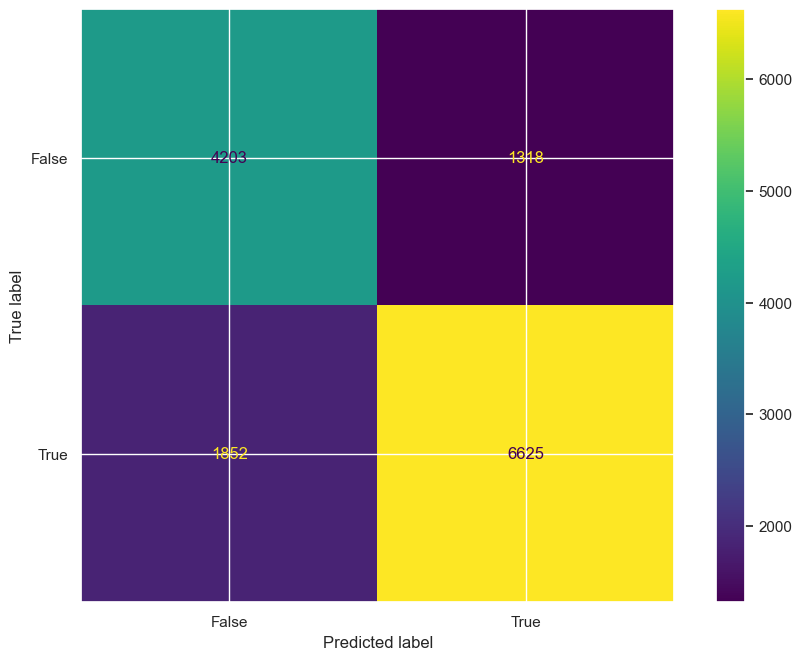

In [196]:
# Confusion matrix of Results from Decision Tree classification
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, model.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels=[False, True])

cm_display.plot()
plt.show()

In [197]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.76      0.69      0.73      6055
           1       0.78      0.83      0.81      7943

    accuracy                           0.77     13998
   macro avg       0.77      0.76      0.77     13998
weighted avg       0.77      0.77      0.77     13998



### Random Forest

In [198]:
from sklearn.ensemble import RandomForestClassifier

# n_estimators = number of decision trees
model = RandomForestClassifier(n_estimators=30)
model.fit(x_train, y_train)
# testing the model
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.945435710586008
0.79239891413059


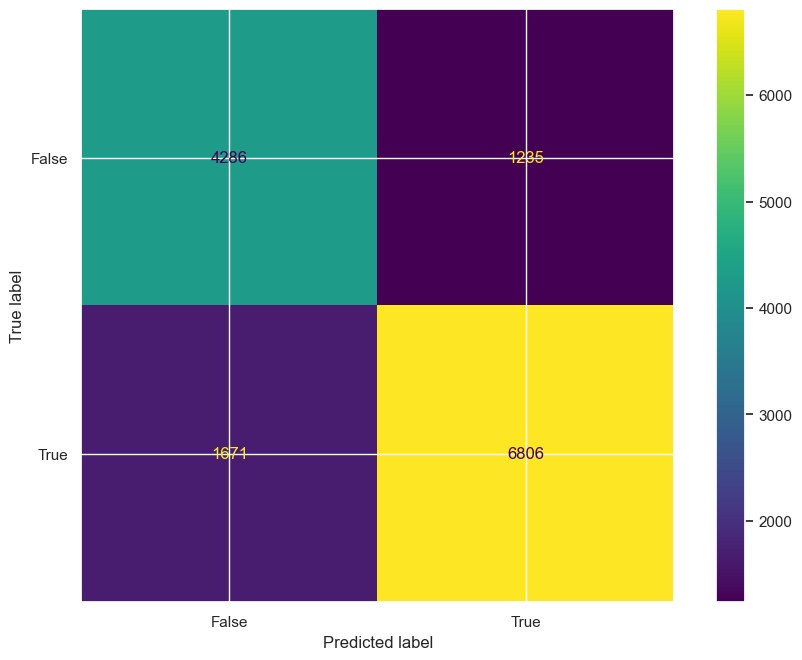

In [199]:
# Confusion matrix of Results from Decision Tree classification
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, model.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels=[False, True])

cm_display.plot()
plt.show()

In [200]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.78      0.72      0.75      5957
           1       0.80      0.85      0.82      8041

    accuracy                           0.79     13998
   macro avg       0.79      0.78      0.79     13998
weighted avg       0.79      0.79      0.79     13998



### XGBoost

In [201]:
import xgboost as xgb

model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(x_train,y_train)

C:\Users\giann\DataspellProjects\CBDA\venv\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [202]:
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.8400042865562879
0.8294042006000857


In [203]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.91      0.73      0.81      6947
           1       0.78      0.93      0.85      7051

    accuracy                           0.83     13998
   macro avg       0.84      0.83      0.83     13998
weighted avg       0.84      0.83      0.83     13998



### Multinomial Naive Bayes

In [204]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train, y_train)
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.8071049670470986
0.7551078725532219


In [205]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.51      0.80      0.62      3495
           1       0.92      0.74      0.82     10503

    accuracy                           0.76     13998
   macro avg       0.71      0.77      0.72     13998
weighted avg       0.81      0.76      0.77     13998



### Support Vector Machine

In [206]:
from sklearn.svm import SVC
model = SVC(kernel='linear')

model.fit(x_train, y_train)
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.8699208773151869
0.8244749249892842


In [207]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.85      0.74      0.79      6302
           1       0.81      0.89      0.85      7696

    accuracy                           0.82     13998
   macro avg       0.83      0.82      0.82     13998
weighted avg       0.83      0.82      0.82     13998



### K-Nearest Neighbours

In [208]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(algorithm = 'brute', n_jobs=-1)

model.fit(x_train, y_train)
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

KeyboardInterrupt: 

In [119]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.84      0.35      0.49      9194
           1       0.19      0.70      0.30      2061

    accuracy                           0.41     11255
   macro avg       0.52      0.52      0.40     11255
weighted avg       0.72      0.41      0.46     11255



### Bagging Decision Tree (Ensemble Learning I)

In [120]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
# max_samples: maximum size 0.5=50% of each sample taken from the full dataset
# max_features: maximum of features 1=100% taken here all 10K
# n_estimators: number of decision trees
model=BaggingClassifier(DecisionTreeClassifier(),max_samples=0.7,max_features=1.0,n_estimators=30)
model.fit(x_train, y_train)
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.9591514882274544
0.8310084406930254


In [121]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.79      0.73      0.76      4160
           1       0.85      0.89      0.87      7095

    accuracy                           0.83     11255
   macro avg       0.82      0.81      0.82     11255
weighted avg       0.83      0.83      0.83     11255



### Boosting Decision Tree (Ensemble Learning II)

In [122]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
# max_samples: maximum size 0.5=50% of each sample taken from the full dataset
# max_features: maximum of features 1=100% taken here all 10K
# n_estimators: number of decision trees
model=AdaBoostClassifier(DecisionTreeClassifier(min_samples_split=10,max_depth=4),n_estimators=5000,learning_rate=0.6)
model.fit(x_train, y_train)
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.9735228787205686
0.8041759218125277


In [123]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.72      0.71      0.71      3874
           1       0.85      0.85      0.85      7381

    accuracy                           0.80     11255
   macro avg       0.78      0.78      0.78     11255
weighted avg       0.80      0.80      0.80     11255

